# Collaborators: Ruba El Houssami and Hawraa Khalil

# Welcome to the Big Five Personality Dataset Analysis!

In this notebook, we embark on a journey to uncover interesting patterns and insights from a dataset containing personality traits and other behavioral attributes.

Our primary focus is to:
1. Process and clean the data for analysis.
2. Compute scores for the **Big Five Personality Traits** (Extraversion, Agreeableness, Conscientiousness, Neuroticism, and Openness).
3. Explore how these traits correlate with various behavioral and demographic attributes.
4. Visualize the relationships between these variables to make the data come alive!

So, buckle up as we dive into the world of data cleaning, correlation, and visualization—all while trying to make this as fun as data analysis can get!

In [11]:
%%capture
!pip install pandas numpy matplotlib scikit-learn

## Step 1: Uploading and Loading the Dataset

The first step in our journey is to bring the data into our notebook. Using Google Colab's `files.upload()` function, we upload the dataset and load it into a Pandas DataFrame.

Here's what we're doing:
- Allowing you to interactively upload the dataset.
- Parsing the uploaded Excel file to load its first sheet as our working DataFrame.
- Taking a sneak peek at the dataset to understand its structure and contents.

Think of this step as unpacking your treasure chest—you're about to discover what gems the data holds!


In [12]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 2: Renaming Columns and Mapping Values

Datasets often come with cryptic column names and inconsistent values, which can make analysis cumbersome. In this step, we:
1. Rename the columns using a `labels_mapping` dictionary to make them more intuitive.
2. Map categorical values (e.g., "Yes"/"No") to numerical representations using `value_mappings_by_label`.

Why is this important?
- Consistent column names and numerical representations make the data analysis process smoother and error-free.
- This also prepares the dataset for advanced operations like correlation analysis and visualization.

If you think of data as a language, this is where we teach it to speak in clear, concise terms that anyone can understand!

In [13]:
labels_mapping = {
    'Sector': 'sector',
    'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?': 'smoked_past_30_days',
    'I see myself as someone who is sympathetic, warm:': 'high_agreeableness',
    'I see myself as someone who is critical, quarrelsome:': 'low_agreeableness',
    'I see myself as someone who is reserved, quiet:': 'low_extraversion',
    'I see myself as someone who is extraverted, enthusiastic:': 'high_extraversion',
    'I see myself as someone who is dependable, self-disciplined:': 'high_conscientiousness',
    'I see myself as someone who is disorganized, careless:': 'low_conscientiousness',
    'I see myself as someone who is anxious, easily upset:': 'high_neuroticism',
    'I see myself as someone who is calm, emotionally stable:': 'low_neuroticism',
    'I see myself as someone who is open to new experiences:': 'high_openness',
    'I see myself as someone who is conventional, uncreative:': 'low_openness',
    'Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?': 'difficult_to_refrain_from_smoking_in_forbidden',
    'How many cigarettes do you smoke each day?': 'cigarette_count',
    'Do you smoke more frequently during the first hours after waking up than during the rest of the day? ': 'smoke_more_upon_wakeup',
    'Do you smoke if you are so ill that you are in bed most of the day?': 'ill_smoking',
    'How soon after you wake up do you smoke your first cigarette?': 'first_cigarette',
    'Which cigarette would you mostly hate to give up?': 'hate_to_give_up',
    'How old were you the first time you smoked a full cigarette (not just a few puffs)?': 'first_cigarette_age',
    'How would you describe your current smoking behavior compared to your smoking behavior before Lebanon\'s economic crisis and revolution began in 2019?': 'compare_before_and_after_economic_crisis',
    'Are you currently able to afford your favorite or preferred cigarette brand(s)?': 'afford_favourite_cigarette_brand',
    'Has 2019\'s revolution or economic crisis caused you to switch away from your favorite or preferred cigarette brand(s) to an  alternative?': 'switch_cigarette_brand_due_to_crisis',
    'Gender:': 'gender',
    'How old are you?': 'age',
    'Which governerate do you live in or spend most of your time in?': 'governerate',
    'What is the highest level of education you have attained?': 'highest_level_of_education',
    'What is your current employment status?':'employment_type',
    'What is your current marital status?': 'marital_status',
    'Do you have close friends?': 'close_friends',
    'Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?': 'out_of_5_closest_friends_are_smokers',
    'What is your main source of income?': 'main_source_of_income',
    'What type of income or financial support does your household receive?': 'lbp_or_usd',
    'If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange).': 'monthly_income',
    'How would you describe your current income sufficiency?': 'income_sufficiency',
    'Including yourself, how many people currently live in your household?': 'household_count_including_self',
    'To what extent were you financially (negatively) affected by the deterioration of the Lebanese economy?': 'severity_of_crisis_financial_affection',
    'How often do you exercise?': 'exercise_rate',
    'On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?': 'social_media_time',
    'How often do you feel stressed?': 'stress_frequency',
    'Employment Status': 'employment_status'
}

In [14]:
value_mappings_by_label = {
    "sector": {
        "Private": 0,
        "Public": 1
    },
    "smoked_past_30_days": {
        "Yes": 1,
        "No": 0
    },
    "high_agreeableness": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "low_agreeableness": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "low_extraversion": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "high_extraversion": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "high_conscientiousness": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "low_conscientiousness": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "high_neuroticism": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "low_neuroticism": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "high_openness": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "low_openness": {
        "Agree strongly": 0,
        "Agree moderately": 1,
        "Agree a little": 2,
        "Neither agree nor disagree": 3,
        "Disagree a little": 4,
        "Disagree moderately": 5,
        "Disagree strongly": 6
    },
    "difficult_to_refrain_from_smoking_in_forbidden": {
        "Yes": 1,
        "No": 0
    },
    "cigarette_count": {
        "10 or less cigarettes/day": 0,
        "11 to 20 cigarettes": 1,
        "21 to 30 cigarettes": 2,
        "31 cigarettes/day or more": 3
    },
    "smoke_more_upon_wakeup": {
        "Yes": 1,
        "No": 0
    },
    "ill_smoking": {
        "Yes": 1,
        "No": 0
    },
    "first_cigarette": {
        "Within 5 minutes": 0,
        "6 to 30 minutes": 1,
        "31 to 60 minutes": 2,
        "After 60 minutes": 3
    },
    "hate_to_give_up": {
        "The first one in the morning": 0,
        "All others": 1
    },
    "compare_before_and_after_economic_crisis": {
        "The number of cigarettes I smoke per day has decreased": 0,
        "The number of cigarettes I smoke per day has remained the same": 1,
        "The number of cigarettes I smoke per day has increased": 2
    },
    "afford_favourite_cigarette_brand": {
        "Yes": 1,
        "No": 0
    },
    "switch_cigarette_brand_due_to_crisis": {
        "No, I am currently using my favorite or preferred cigarette brand(s)": 0,
        "Yes, I am currently using a cheaper alternative": 1,
        "Yes, I am currently using a more expensive alternative": 2
    },
    "gender": {
        "Male": 0,
        "Female": 1
    },
    "governerate": {
        "Beirut": 0,
        "Mount Lebanon": 1,
        "North Lebanon": 2,
        "South Lebanon": 3,
        "Beqaa": 4,
        "Nabatieh": 5,
        "Akkar": 6,
        "Baalbeck - Hermel": 7,
        "Keserwan - Jbeil": 8
    },
    "highest_level_of_education": {
        "Less than high school": 0,
        "High school degree or equivalent (e.g. GED)": 1,
        "Incomplete bachelor's degree": 2,
        "Bachelor's degree (BA/BS)": 3,
        "Graduate degree (MA/MS)": 4,
        "Incomplete graduate degree": 5,
        "Post-graduate degree (PhD, MD, or other)": 6
    },
    "employment_type": {
        "Student only": 0,
        "Student with a part-time or full-time job": 1,
        "Employee; full-time": 2,
        "Employee; part-time": 3,
        "Business owner": 4,
        "Other, please specify": 5,
        "Unemployed (but seeking employment)": 6,
        "Homemaker": 7
    },
    "marital_status": {
        "Single": 0,
        "Engaged": 1,
        "Married": 2,
        "Divorced/Separated": 3,
        "Other, please specify": 4
    },
    "close_friends": {
        "Yes": 1,
        "No": 0
    },
    "main_source_of_income": {
        "Parents": 0,
        "Job": 1,
        "Investment": 2,
        "Own business income": 3,
        "Other, please specify": 4
    },
    "lbp_or_usd": {
        "Fully in Lebanese Lira": 0,
        "Fully in US Dollars": 1,
        "Mixed": 2,
        "Other, please specify": 3
    },
    "monthly_income": {
        "I don't know": 0,
        "I prefer not to say": 1,
        "Less than 1 million L.L": 2,
        "Between 1 and 4 million L.L": 3,
        "Between 4 and 8 million L.L": 4,
        "Between 8 and 12 million L.L": 5,
        "Between 12 and 16 million L.L": 6,
        "Between 16 and 20 million L.L": 7,
        "More than 20 million L.L": 8
    },
    "income_sufficiency": {
        "Very low income: does not cover basic needs for a month": 0,
        "Low: barely covers basic needs for a month": 1,
        "Medium: covers all basic needs": 2,
        "High: completely covers necessities with a few luxury items": 3,
        "Extremely high: covers a wide range of luxury items": 4
    },
    "severity_of_crisis_financial_affection": {
        "Not at all": 0,
        "Slightly": 1,
        "Moderately": 2,
        "Very": 3,
        "Extremely": 4
    },
    "exercise_rate": {
        "Never": 0,
        "Sometimes or a few days every month": 1,
        "Often or at least 3 days every week": 2,
        "Every day or at least 5 times every week": 3
    },
    "social_media_time": {
        "I don't use any social media platforms": 0,
        "Less than 1 hour": 1,
        "Between 1 hour and 2 hours": 2,
        "Between 2 and 3 hours": 3,
        "Between 3 and 4 hours": 4,
        "More than 4 hours": 5
    },
    "stress_frequency": {
        "Rarely": 1,
        "Occasionally": 2,
        "Frequently": 3,
        "Constantly": 4,
        "Never": 0
    },
    "employment_status": {
        "Unemployed": 0,
        "Employed": 1
    }
}

In [16]:
print("Please upload your Excel file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

data = pd.ExcelFile(file_name)
print("Available Sheets:", data.sheet_names)

original_df = data.parse(data.sheet_names[0])
print("Original DataFrame:")
original_df.head()

Please upload your Excel file:


Saving 2024_PersonalityTraits_SurveyData.xls to 2024_PersonalityTraits_SurveyData (13).xls
Available Sheets: ['Sheet1']
Original DataFrame:


,Unnamed: 0,Sector,Last page,Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?,"I see myself as someone who is extraverted, enthusiastic:","I see myself as someone who is critical, quarrelsome:","I see myself as someone who is dependable, self-disciplined:","I see myself as someone who is anxious, easily upset:",I see myself as someone who is open to new experiences:,"I see myself as someone who is reserved, quiet:",...,What type of income or financial support does your household receive?,What type of income or financial support does your household receive? [Comment],"If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange).",How would you describe your current income sufficiency?,"Including yourself, how many people currently live in your household?",To what extent were you financially (negatively) affected by the deterioration of the Lebanese economy?,How often do you exercise?,"On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?",How often do you feel stressed?,Employment Status
0,5,Private,5,Yes,Agree strongly,Disagree moderately,Agree strongly,Agree moderately,Agree strongly,Agree a little,...,Fully in Lebanese Lira,NaN,More than 20 million L.L,High: completely covers necessities with a few...,4,Very,Never,Between 2 and 3 hours,Frequently,Employed
1,11,Private,5,Yes,Agree moderately,Agree moderately,Agree moderately,Agree a little,Agree strongly,Disagree strongly,...,Fully in US Dollars,NaN,More than 20 million L.L,High: completely covers necessities with a few...,4,Slightly,Often or at least 3 days every week,Between 2 and 3 hours,Occasionally,Unemployed
2,14,Private,5,Yes,Disagree moderately,Neither agree nor disagree,Agree a little,Agree moderately,Disagree a little,Agree moderately,...,Fully in Lebanese Lira,NaN,I don't know,High: completely covers necessities with a few...,4,Moderately,Every day or at least 5 times every week,More than 4 hours,Constantly,Employed
3,15,Private,5,Yes,Agree strongly,Disagree moderately,Agree strongly,Disagree strongly,Agree strongly,Disagree moderately,...,Mixed,NaN,I don't know,Medium: covers all basic needs,5,Moderately,Often or at least 3 days every week,Between 2 and 3 hours,Occasionally,Employed
4,16,Private,5,Yes,Agree a little,Agree a little,Agree strongly,Disagree moderately,Agree moderately,Agree strongly,...,"Other, please specify",NaN,I prefer not to say,Medium: covers all basic needs,6,Slightly,Every day or at least 5 times every week,Less than 1 hour,Never,Employed


## Step 3: Handling Missing and Unmapped Values

Here’s where things get interesting—we tackle the unexpected!

- **Unmapped Values**: These are values in the dataset that don’t appear in our predefined dictionaries. When we encounter such values:
  - We print them to alert you.
  - Dynamically assign them the next available integer value in the dictionary.
- **Missing Values (NaN)**: Missing values can throw off our analysis. To handle them:
  - We replace them with "Other" or "Other, please specify" (if available in the dictionary).
  - If these placeholders are not in the dictionary, we add them dynamically and assign them a value.

This step ensures that no value is left behind. It’s like making sure everyone has a ticket before boarding the analysis train!


In [17]:
def process_dataframe(df):
    df = df.rename(columns=labels_mapping)

    mapped_columns = labels_mapping.values()
    df = df[[col for col in df.columns if col in mapped_columns]]

    for col, value_map in value_mappings_by_label.items():
        if col in df.columns:
            unmapped_values = df[~df[col].isin(value_map.keys())][col].unique()
            for value in unmapped_values:
                if pd.notna(value):
                    print(f"Unmapped value found in column '{col}': {value}")
                    next_value = max(value_map.values()) + 1 if value_map else 0
                    value_map[value] = next_value
                    print(f"Added '{value}' to '{col}' dictionary with value {next_value}")

            if df[col].isna().any():
                other_placeholder = "Other, please specify" if "Other, please specify" in value_map else "Other"
                if other_placeholder not in value_map:
                    next_value = max(value_map.values()) + 1 if value_map else 0
                    value_map[other_placeholder] = next_value
                    print(f"Added '{other_placeholder}' to '{col}' dictionary with value {next_value}")
                df[col].fillna(other_placeholder, inplace=True)

            df[col] = df[col].map(value_map)
    return df


In [18]:
df = original_df.copy()
df = process_dataframe(df)
print("Transformed DataFrame:")
df.head()

Added 'Other' to 'low_agreeableness' dictionary with value 7
Transformed DataFrame:


<ipython-input-17-0cac59123ecd>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(other_placeholder, inplace=True)


,sector,smoked_past_30_days,high_extraversion,low_agreeableness,high_conscientiousness,high_neuroticism,high_openness,low_extraversion,high_agreeableness,low_conscientiousness,...,main_source_of_income,lbp_or_usd,monthly_income,income_sufficiency,household_count_including_self,severity_of_crisis_financial_affection,exercise_rate,social_media_time,stress_frequency,employment_status
0,0,1,0,5,0,1,0,2,0,4,...,3,0,8,3,4,3,0,3,3,1
1,0,1,1,1,1,2,0,6,0,3,...,0,1,8,3,4,1,2,3,2,0
2,0,1,5,3,2,1,4,1,3,2,...,0,0,0,3,4,2,3,5,4,1
3,0,1,0,5,0,6,0,5,1,6,...,0,2,0,2,5,2,2,3,2,1
4,0,1,2,2,0,5,1,0,3,5,...,2,3,1,2,6,1,3,1,0,1


## Step 4: Adding Big Five Personality Traits

The Big Five personality traits are central to this analysis. These traits give us a deeper understanding of behavior and personality:
- **Extraversion**: How outgoing and energetic someone is.
- **Agreeableness**: How kind and cooperative someone is.
- **Conscientiousness**: How organized and disciplined someone is.
- **Neuroticism**: How anxious or emotionally stable someone is.
- **Openness**: How curious and imaginative someone is.

For each trait, we compute a score as:
**High Trait - Low Trait**

This gives us a single score (ranging from -5 to 5) for each personality dimension, helping us quantify and visualize these complex characteristics.


In [19]:
def compute_ocean5_character_traits(df):
    big_five_traits = {
        "agreeableness": ("high_agreeableness", "low_agreeableness"),
        "extraversion": ("high_extraversion", "low_extraversion"),
        "conscientiousness": ("high_conscientiousness", "low_conscientiousness"),
        "neuroticism": ("high_neuroticism", "low_neuroticism"),
        "openness": ("high_openness", "low_openness")
    }

    for trait, (high_col, low_col) in big_five_traits.items():
        if high_col in df.columns and low_col in df.columns:
            df[trait] = df[high_col] - df[low_col]
        else:
            print(f"Columns for trait '{trait}' not found: {high_col}, {low_col}")

    return df

In [ ]:
new_df = compute_ocean5_character_traits(df)
print("Transformed DataFrame:")
new_df.head()

Transformed DataFrame:


,sector,smoked_past_30_days,high_extraversion,low_agreeableness,high_conscientiousness,high_neuroticism,high_openness,low_extraversion,high_agreeableness,low_conscientiousness,...,severity_of_crisis_financial_affection,exercise_rate,social_media_time,stress_frequency,employment_status,agreeableness,extraversion,conscientiousness,neuroticism,openness
0,0,1,0,5,0,1,0,2,0,4,...,3,0,3,3,1,-5,-2,-4,-1,-6
1,0,1,1,1,1,2,0,6,0,3,...,1,2,3,2,0,-1,-5,-2,2,-3
2,0,1,5,3,2,1,4,1,3,2,...,2,3,5,4,1,0,4,0,-2,3
3,0,1,0,5,0,6,0,5,1,6,...,2,2,3,2,1,-4,-5,-6,3,-6
4,0,1,2,2,0,5,1,0,3,5,...,1,3,1,0,1,1,2,-5,5,-5


## Step 5: Correlation Analysis

Now that our dataset is ready, we dive into correlation analysis to discover relationships between variables.

Here's what we do:
- Compute the correlation matrix for all numerical columns.
- Focus on relationships where the correlation is strong (e.g., |correlation| > 0.7).
- Identify variables that are most strongly related to each other.

This step is like playing detective—finding clues about how different attributes influence or relate to each other! This is important because we do not want to include all the features when training, especially if they are not related.


In [20]:
def get_correlated_columns(df, column, threshold=0.7):
    other_columns = [
        'exercise_rate',
        'social_media_time',
        'stress_frequency',
        'employment_status',
        'income_sufficiency',
        'first_cigarette_age',
        'main_source_of_income',
        'employment_type',
        'highest_level_of_education',
        'marital_status',
        'difficult_to_refrain_from_smoking_in_forbidden',
        'smoke_more_upon_wakeup',
        'ill_smoking',
        'first_cigarette',
        'hate_to_give_up',
        'compare_before_and_after_economic_crisis',
        'afford_favourite_cigarette_brand',
        'switch_cigarette_brand_due_to_crisis',
        'close_friends',
        'out_of_5_closest_friends_are_smokers',
        'lbp_or_usd',
        'monthly_income',
        'household_count_including_self',
        'severity_of_crisis_financial_affection',
    ]
    other_columns.remove(column)

    if column not in df.columns:
        raise ValueError(f"Column '{column}' is not in the dataset.")

    valid_columns = [col for col in other_columns if col in df.columns]

    if not valid_columns:
        raise ValueError("No valid columns found in the provided `other_columns` list.")

    correlations = df[valid_columns].corrwith(df[column])
    correlated_columns = correlations[correlations.abs() > threshold].index.tolist()

    return correlated_columns

In [21]:
data = new_df

constant_features = ['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness', 'gender', 'age', 'governerate']

targets = [
    "exercise_rate",
    "social_media_time",
    "stress_frequency",
    "employment_status",
    "income_sufficiency",
    "first_cigarette_age",
    'main_source_of_income',
    'employment_type',
    'highest_level_of_education',
    'marital_status',
    'difficult_to_refrain_from_smoking_in_forbidden',
    'smoke_more_upon_wakeup',
    'ill_smoking',
    'first_cigarette',
    'hate_to_give_up',
    'compare_before_and_after_economic_crisis',
    'afford_favourite_cigarette_brand',
    'switch_cigarette_brand_due_to_crisis',
    'close_friends',
    'out_of_5_closest_friends_are_smokers',
    'lbp_or_usd',
    'monthly_income',
    'household_count_including_self',
    'severity_of_crisis_financial_affection',
]

In [22]:
results = {}

for target_name in targets:

    print(f"\nPredicting: {target_name}")

    variables = get_correlated_columns(data, target_name)

    features = constant_features + variables

    X = data[features]
    y = data[target_name]

    # Determine if the target is categorical or continuous
    if y.nunique() <= 10:  # Arbitrary threshold for classification vs regression
        task_type = "classification"
        model = RandomForestClassifier(random_state=42)
    else:
        task_type = "regression"
        model = RandomForestRegressor(random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    if task_type == "classification":
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
        results[target_name] = {"Accuracy": accuracy, "Model": model}
    else:
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse:.2f}")
        results[target_name] = {"MSE": mse, "Model": model}
    print('-' * 30)


Predicting: exercise_rate
Accuracy: 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.56      0.49        18
           1       0.34      0.40      0.37        25
           2       0.33      0.25      0.29        16
           3       0.00      0.00      0.00         5

    accuracy                           0.38        64
   macro avg       0.28      0.30      0.29        64
weighted avg       0.34      0.38      0.35        64

------------------------------

Predicting: social_media_time
Accuracy: 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.56      0.47      0.51        19
           3       0.40      0.73      0.52        22
           4       0.40      0.20      0.27        10
           5       0.33      0.09      0.14        11

    accuracy                           0.44        64
   macro avg       0.34      0.30      0.29        64
weighted avg       0.42      0.44      0.40        64

------------------------------

Predicting: stress_frequency
Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.22      0.31         9
           2       0.29      0.30      0.29        20
           3       0.52      0.59      0.55        29
           4       0.33      0.33      0.33         6

    accuracy                           0.42        64
   macro avg       0.41      0.36      0.37        64
weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.97      0.84        33
           1       0.62      0.62      0.62        21
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5

    accuracy                           0.70        64
   macro avg       0.27      0.32      0.29        64
weighted avg       0.59      0.70      0.64        64

------------------------------

Predicting: employment_type


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76        31
           1       0.39      0.41      0.40        17
           2       0.17      0.11      0.13         9
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1

    accuracy                           0.55        64
   macro avg       0.21      0.23      0.22        64
weighted avg       0.45      0.55      0.49        64

------------------------------

Predicting: highest_level_of_education
Accuracy: 0.42


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.53      0.47      0.50        19
           3       0.47      0.58      0.52        26
           4       0.22      0.29      0.25         7
           5       1.00      0.10      0.18        10
           6       0.00      0.00      0.00         0

    accuracy                           0.42        64
   macro avg       0.32      0.21      0.21        64
weighted avg       0.53      0.42      0.41        64

------------------------------

Predicting: marital_status
Accuracy: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86        49
           1       0.00      0.00      0.00         5
           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5

    accuracy                           0.77        64
   macro avg       0.25      0.26      0.25        64
weighted avg       0.62      0.77      0.68        64

------------------------------

Predicting: difficult_to_refrain_from_smoking_in_forbidden
Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.79      0.68        33
           1       0.65      0.42      0.51        31

    accuracy                           0.61        64
   macro avg       0.62      0.60      0.59        64
weighted avg       0.62      0.61      0.60        64

------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Accuracy: 0.30
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.36      0.33      0.34        15
           3       0.40      0.43      0.41        14
           4       0.00      0.00      0.00         7
           5       0.32      0.44      0.37        18

    accuracy                           0.30        64
   macro avg       0.18      0.20      0.19        64
weighted avg       0.26      0.30      0.28        64

------------------------------

Predicting: lbp_or_usd


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.45      0.35        20
           1       0.43      0.18      0.25        17
           2       0.35      0.33      0.34        27

    accuracy                           0.33        64
   macro avg       0.36      0.32      0.31        64
weighted avg       0.35      0.33      0.32        64

------------------------------

Predicting: monthly_income
Accuracy: 0.30
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.33      0.29         6
           2       0.00      0.00      0.00         1
           3       0.40      0.20      0.27        10
           4       0.25      0.17      0.20         6
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         3
           7       0.17      0.20      0.18      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.22      0.22      0.22         9
           4       0.16      0.38      0.22        13
           5       0.47      0.37      0.41        19
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0

    accuracy                           0.22        64
   macro avg       0.09      0.11      0.10        64
weighted avg       0.20      0.22      0.20        64

------------------------------

Predicting: severity_of_crisis_financial_affection
Accuracy: 0.27
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.25      0.13      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 7: Dynamic Exploration Functions

To make this notebook reusable and efficient, we've added dynamic functions that allow you to:
1. **Reinitialize the Dataset**: Reset the analysis with the original dataset without re-uploading.
2. **Identify Correlations**: Get a list of highly correlated columns for any given column.
3. **Handle Missing and New Values**: Automatically update mappings when new or missing values are encountered.

This makes the notebook a powerful tool for iterative analysis, ensuring that you can experiment with different approaches without losing track of the original data.


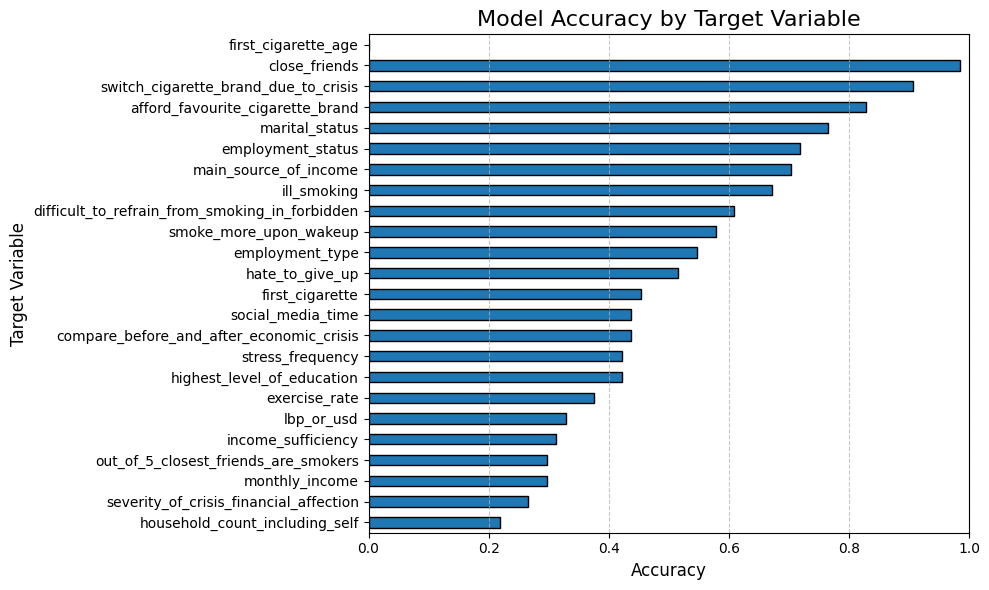

In [23]:
# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame.from_dict(results, orient="index")

# Plot the results
plt.figure(figsize=(10, 6))
results_df["Accuracy"].sort_values().plot(kind="barh", edgecolor="black")
plt.title("Model Accuracy by Target Variable", fontsize=16)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Target Variable", fontsize=12)
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Github repository: https://github.com/RubaHoussami/EECE_490_Hackathon